In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px

from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', None)

In [2]:
tf_df = pd.read_csv('tf_df.csv', index_col=0)

In [3]:
tf_df.head()

,highway - residential,highway - service,highway - footway,oneway - yes,surface - asphalt,highway - tertiary,building - yes,footway - sidewalk,service - driveway,highway - crossing,...,service - yard,waterway - canal,amenity - shelter,highway - tertiary_link,leaf_cycle - deciduous,foot - permissive,natural - scrub,service - spur,barrier - bollard,landuse - forest
0,1.769788,1.383840,0.000000,0.000000,1.008510,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.831660,1.845120,10.114359,6.814018,1.008510,0.000000,7.377385,3.798558,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.415830,0.922560,0.000000,3.407009,1.008510,0.000000,1.053912,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,2.306399,16.014402,11.924531,21.178720,0.000000,1.053912,12.661860,0.0,12.772901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.353958,1.383840,0.842863,3.407009,4.034042,2.064579,3.161736,1.266186,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
tf_df.shape

(1050, 121)

## Perform LDA

In [7]:
params_grid = {'n_components': range(3,11), 
               'doc_topic_prior': [0.05, 0.1, 0.5, 1, 5, 10],
               'topic_word_prior': [0.05, 0.1, 0.5, 1, 5, 10],
              }

In [8]:
# Default for each prior is 1/n_components

In [9]:
grid = GridSearchCV(LatentDirichletAllocation(random_state=42), params_grid)

In [10]:
_ = grid.fit(tf_df)
best_model = grid.best_estimator_
best_model.get_params()

In [13]:
best_model.doc_topic_prior_

0.1

In [15]:
results = pd.DataFrame(grid.cv_results_)
results.to_csv('strava_grid.csv')

In [47]:
results = results.rename(columns={'param_doc_topic_prior': 'alpha',
                                'param_topic_word_prior': 'beta',
                                'mean_test_score': 'mean perplexity',
                                 'param_n_components': 'number of topics'})

In [97]:
col = plt.cm.jet([0.25,0.75])   
n = 10
colors = plt.cm.jet(np.linspace(0,1,n))

<Figure size 432x288 with 0 Axes>

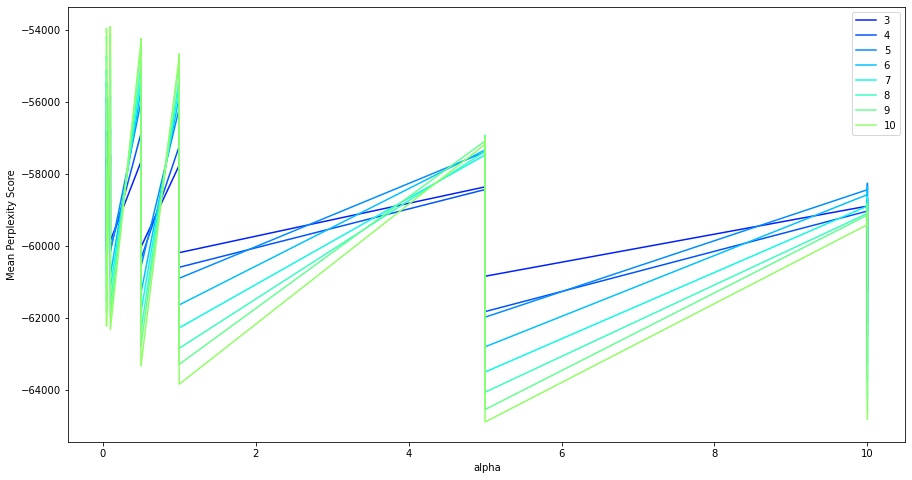

In [102]:
plt.set_cmap('jet')

fig, ax = plt.subplots(figsize=(15,8))

for n in range(3, 11):
    results[results['number of topics'] == n][['alpha', 'mean perplexity']].plot(x='alpha', ax=ax, color=colors[n])

ax.legend(list(range(3, 11)))
ax.set_ylabel('Mean Perplexity Score')
plt.savefig('alpha_perplexity.png', bbox_inches='tight')
plt.show()

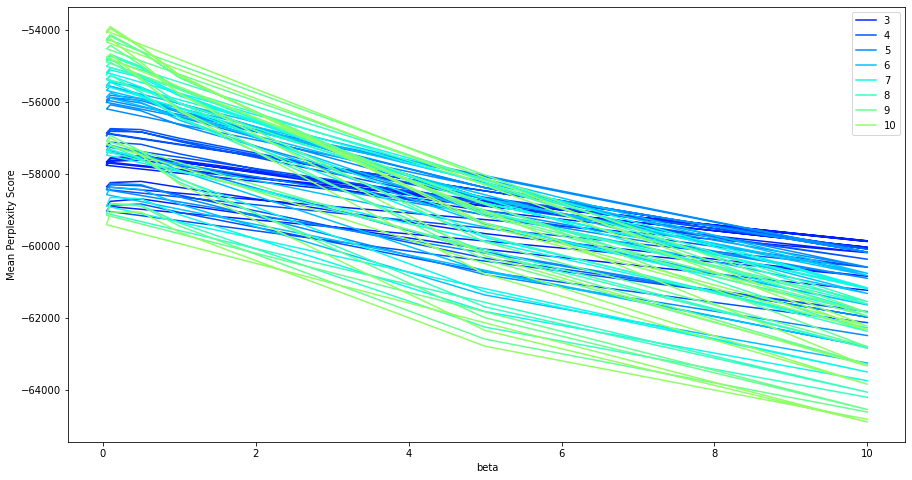

In [103]:
fig, ax = plt.subplots(figsize=(15,8))

for n in range(3, 11):
    results[results['number of topics'] == n][['beta', 'mean perplexity']].plot(x='beta', ax=ax, color=colors[n])

ax.legend(list(range(3, 11)))
ax.set_ylabel('Mean Perplexity Score')
plt.savefig('beta_perplexity.png', bbox_inches='tight')
plt.show()